<a href="https://colab.research.google.com/github/anthonymalumbe/anthonyml_portfolio/blob/main/29102023_Detection_of_COVID_19_through_Chest_Imaging_Using_Fast_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##import subprocess
#import tensorflow as tf
#
#def downgrade_tensorflow(desired_version):
#    try:
#        current_version = tf.__version__
#        if current_version == desired_version:
#            print(f"TensorFlow is already at version {desired_version}. No downgrade needed.")
#        else:
#            # Uninstall the current TensorFlow version
#            uninstall_command = f"pip uninstall tensorflow -y"
#            subprocess.run(uninstall_command, shell=True, check=True)
#
#            # Install the desired TensorFlow version
#            install_command = f"pip install tensorflow=={desired_version}"
#            subprocess.run(install_command, shell=True, check=True)
#
#            print(f"Successfully downgraded TensorFlow to version {desired_version}")
#    except Exception as e:
#        print(f"Error: {e}")
#desired_version = "2.9.1"  # Replace with your desired TensorFlow version
#downgrade_tensorflow(desired_version)
#
#!pip uninstall -q tensorflow
#!pip install tensorflow

In [1]:
!pip install efficientnet-pytorch
!pip install GPUtil
!pip install timm
!pip install Flask
!pip install Flask-Cors
!pip install streamlit
!pip install pickle5
!pip install -Uqq fastbook
!pip install gradio

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=a9d80b8ec2fa44a715011c00cb89670c85a55aeb98de922dbc4b258b44fda377
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=ff4d38bf13cdb71ee5fa119b4442962a9125dcf30f79ef94c2ea39240bc33eb9
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.9 MB/s eta

In [2]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
import shutil
import sys
import tensorflow.keras as keras
import fastai
import torch
import timm
import streamlit as st
import pickle5 as pickle
#import keras.backend as K

#from GPUtil import showUtilization as gpu_usage
#from numba import cuda

from pathlib import Path
from time import perf_counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalMaxPooling2D, Dropout, Dense,  Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.callbacks import LearningRateScheduler
from imblearn.over_sampling import SMOTE
from fastai.vision.all import *

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))

#dtype='float16'
#K.set_floatx(dtype)

# default is 1e-7 which is too small for float16.  Without adjusting the epsilon, we will get NaN predictions because of divide by zero problems
#K.set_epsilon(1e-4)

In [ ]:
#!pip list command

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiofiles                         23.2.1
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.1.0

In [ ]:

from GPUtil import showUtilization as gpu_usage
from numba import cuda
def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()


Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% | 98% |
GPU Usage after emptying the cache
| ID | GPU  | MEM |
-------------------
|  0 | 100% |  1% |


In [3]:
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anthonymalumbe","key":"727a37d3a400191d516dca03e9d5a507"}'}

In [6]:
! rm -r ~/.kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

rm: cannot remove '/root/.kaggle': No such file or directory


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# defining Path

checkfileexists = '/covidqu.zip'

# Checking whether the specified path exists
isFile = os.path.isfile(checkfileexists)
if not isFile:
  !kaggle datasets download anasmohammedtahir/covidqu

100% 1.15G/1.15G [00:55<00:00, 23.2MB/s]
100% 1.15G/1.15G [00:55<00:00, 22.4MB/s]


In [9]:
def create_directories(paths):
    """
    Create directories if they do not exist.

    Parameters:
    - paths: A list of directory paths to be checked and created if they do not exist.

    This function takes a list of directory paths and checks whether each specified path exists.
    If a path does not exist, it creates a new directory at that location.

    Example usage:
    paths_to_create = ["dataset/covid", "dataset/normal", "dataset/non_covid"]
    create_directories(paths_to_create)
    """
    for path in paths:
        # Check whether the specified path exists
        is_exist = os.path.exists(path)
        if not is_exist:
            # Create a new directory because it does not exist
            os.makedirs(path)

In [10]:
    paths_to_create = ["dataset/test/covid", "dataset/test/normal", "dataset/test/non_covid", "dataset/train/covid", "dataset/train/normal", "dataset/train/non_covid","dataset/val/covid", "dataset/val/normal", "dataset/val/non_covid","dataset/unknowndataset/unknown"]
    create_directories(paths_to_create)

In [ ]:
#!unzip -n -q covidqu.zip  -d "COVID-QU-Ex Dataset/"

In [ ]:
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/non_covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/covid
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Normal/images/*' -d /content/dataset/normal
#!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/non_covid

In [11]:
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/test/covid
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*' -d /content/dataset/test/normal
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/test/non_covid
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/train/covid
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*' -d /content/dataset/train/normal
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/train/non_covid
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/val/covid
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*' -d /content/dataset/val/normal
!unzip -q -j -n /content/covidqu.zip 'Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/val/non_covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/images/*' -d /content/dataset/test/covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Normal/images/*' -d /content/dataset/test/normal
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/images/*' -d /content/dataset/test/non_covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/*' -d /content/dataset/train/covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Normal/images/*' -d /content/dataset/train/normal
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/images/*' -d /content/dataset/train/non_covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/images/*' -d /content/dataset/val/covid
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Normal/images/*' -d /content/dataset/val/normal
!unzip -q -j -n /content/covidqu.zip 'Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images/*' -d /content/dataset/val/non_covid

In [12]:
# Create a list with the filepaths for training and testing
dir_ = Path('/content/dataset/train')
train_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/test')
test_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/val')
val_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/unknowndataset/unknown')
unknown_file_paths = list(dir_.glob(r'**/*.png'))

In [13]:
def extract_labels_from_filename(filepath):
    """Create a DataFrame with filepaths and labels extracted from filenames.

    This function takes a list of filepaths and extracts labels from the filenames
    if they contain "covid," "non_covid," or "normal." It creates a DataFrame with
    two columns: 'Filepath' and 'Label', where 'Filepath' contains the file paths
    of the images and 'Label' contains the extracted labels.

    Args:
        filepath (list): A list of filepaths.

    Returns:
        pd.DataFrame: A DataFrame with 'Filepath' and 'Label' columns.
    """

    # Extract labels from filenames that contain "covid," "non_covid," or "normal" (case-insensitive)
    labels = []
    for filename in filepath:
        label = Path(filename).name
        if "covid" in label:
            labels.append("covid")
        elif "non_" in label:
            labels.append("non_covid")
        elif "Normal" in label:
            labels.append("normal")
        else:
            labels.append("unknown")

    # Create Series for filepaths and labels
    filepath = pd.Series(filepath, name='Filepath', dtype='str')
    labels = pd.Series(labels, name='Label', dtype='str')

    # Concatenate filepaths and labels into a DataFrame
    df = pd.concat([filepath, labels], axis=1)

    # Filter out rows where the label is "unknown"
    df = df[df['Label'] != 'unknown']

    # Shuffle the DataFrame and reset the index
    df = df.sample(frac=1, random_state=0).reset_index(drop=True)

    return df

train_df = extract_labels_from_filename(train_file_paths)
val_df = extract_labels_from_filename(val_file_paths)
# Combine train_df and val_df
train_df = pd.concat([train_df, val_df]).reset_index(drop=True)
test_df = extract_labels_from_filename(test_file_paths)

# Print information about the dataset
print(f'Number of pictures in the training set: {train_df.shape[0]}')
#print(f'Number of pictures in the test set: {test_df.shape[0]}')

# Number of different labels and labels themselves
unique_labels = train_df['Label'].unique()
print(f'Number of different labels: {len(unique_labels)}')
print(f'Labels: {unique_labels}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(10)


Number of pictures in the training set: 20628
Number of different labels: 3
Labels: ['normal' 'covid' 'non_covid']


,Filepath,Label
0,/content/dataset/train/normal/Normal (5217).png,normal
1,/content/dataset/train/normal/Normal (3560).png,normal
2,/content/dataset/train/normal/Normal (3903).png,normal
3,/content/dataset/train/normal/Normal (10341).png,normal
4,/content/dataset/train/covid/covid_274.png,covid
5,/content/dataset/train/covid/covid_1149.png,covid
6,/content/dataset/train/normal/Normal (11198).png,normal
7,/content/dataset/train/non_covid/non_COVID (1751).png,non_covid
8,/content/dataset/train/normal/Normal (11980).png,normal
9,/content/dataset/train/normal/Normal (2461).png,normal


In [14]:
# Define the source folders
source_folders = ["dataset/test/covid", "dataset/test/normal", "dataset/test/non_covid", "dataset/train/covid", "dataset/train/normal", "dataset/train/non_covid","dataset/val/covid", "dataset/val/normal", "dataset/val/non_covid"]

# Define the target folder for unknown files
target_folder = "unknowndataset/unknown"

# Define the allowed file name patterns
allowed_patterns = ["covid", "normal", "non_covid"]

# Create the target directory if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

stdout_orig = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Iterate through the source folders
for source_folder in source_folders:
    # List files in the source folder
    files = os.listdir(source_folder)

    # Iterate through the files in the source folder
    for file in files:
        # Check if the file name doesn't match any of the allowed patterns
        if all(pattern not in file.lower() for pattern in allowed_patterns):
            # Construct the source file path and target file path
            source_path = os.path.join(source_folder, file)
            target_path = os.path.join(target_folder, file)

            # Move the file to the "dataset/unknown" folder
            shutil.move(source_path, target_path)
            print(f"Moved {file} to {target_folder}")

# Restore stdout
sys.stdout.close()
sys.stdout = stdout_orig

print("File moving complete.")

File moving complete.


In [15]:
# Create a list with the filepaths for training and testing
dir_ = Path('/content/dataset/train')
strain_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/test')
stest_file_paths = list(dir_.glob(r'**/*.png'))

dir_ = Path('/content/dataset/val')
sval_file_paths = list(dir_.glob(r'**/*.png'))

In [16]:
train_df = extract_labels_from_filename(strain_file_paths)
val_df = extract_labels_from_filename(sval_file_paths)
# Combine train_df and val_df
train_df = pd.concat([train_df,val_df]).reset_index(drop = True)
test_df = extract_labels_from_filename(stest_file_paths)

# Print information about the dataset
print(f'Number of pictures in the training set: {train_df.shape[0]}')
print(f'Number of pictures in the test set: {test_df.shape[0]}')
print(f'Number of pictures in the validation set: {val_df.shape[0]}\n')

print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.reset_index()
train_df.head(5)

Number of pictures in the training set: 20628
Number of pictures in the test set: 5173
Number of pictures in the validation set: 4138

Number of different labels: 3

Labels: ['normal' 'covid' 'non_covid']


,Filepath,Label
0,/content/dataset/train/normal/Normal (5217).png,normal
1,/content/dataset/train/normal/Normal (3560).png,normal
2,/content/dataset/train/normal/Normal (3903).png,normal
3,/content/dataset/train/normal/Normal (10341).png,normal
4,/content/dataset/train/covid/covid_274.png,covid


In [17]:
#@tf.function
def init_data(data_dir: str) -> tuple:
    """
    Initialize data generators for training and validation.

    Args:
        data_dir (str): The root directory containing 'train' and 'val' subdirectories.

    Returns:
        tuple: A tuple containing the training and validation data generators.
               (train_data, valid_data)
    """
    # Combine data directories for training and validation
    train_dir = os.path.join(data_dir, 'train')
    valid_dir = os.path.join(data_dir, 'val')

    # Data augmentation for training images
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.0,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Validation data generator with rescaling only
    valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.0
    )

    # Create a generator for training data
    train_data = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=16,
        shuffle=True,
        seed=42
    )

    # Create a generator for validation data
    valid_data = valid_datagen.flow_from_directory(
        directory=valid_dir,
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=16,
        shuffle=True,
        seed=42
    )

    # Return the training and validation data generators as a tuple
    return train_data, valid_data

# Initialize training and validation data generators
train_data, valid_data = init_data('/content/dataset')
train_data.samples, valid_data.samples

Found 16531 images belonging to 3 classes.
Found 4138 images belonging to 3 classes.


(16531, 4138)

In [18]:
# Print batch shapes and sample training labels
print("train batch ", train_data.__getitem__(0)[0].shape)  # Shape of the first training batch
print("test batch ", valid_data.__getitem__(0)[0].shape)  # Shape of the first validation batch
print("sample train label \n", train_data.__getitem__(0)[1][:5])  # Sample of the first 5 training labels

train batch  (16, 224, 224, 3)
test batch  (16, 224, 224, 3)
sample train label 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [19]:
# Display the class indices mapping for the training data
print("Class indices mapping for training data: ", train_data.class_indices)

Class indices mapping for training data:  {'covid': 0, 'non_covid': 1, 'normal': 2}


In [20]:
# Display the class indices mapping for the validation data
print("Class indices mapping for validation data: ", valid_data.class_indices)

Class indices mapping for validation data:  {'covid': 0, 'non_covid': 1, 'normal': 2}


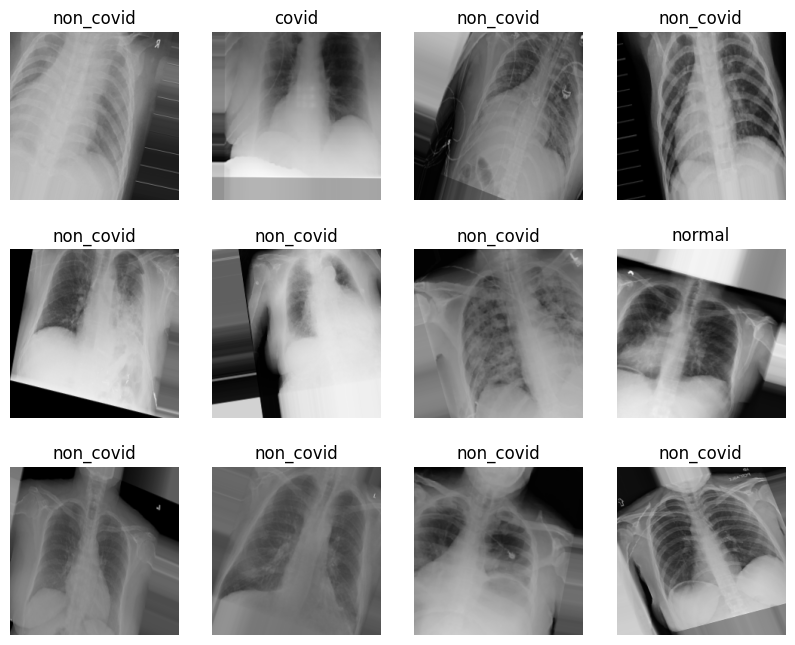

In [21]:
# Define the labels corresponding to the classes in the dataset
labels = ['covid', 'non_covid', 'normal']

# Retrieve a sample batch of data and labels from the training and validation sets
sample_data = train_data.__getitem__(1)[0]  # Get a sample batch from the training data
sample_label = valid_data.__getitem__(1)[1]  # Get a sample batch from the validation data

# Create a plot to visualize the sample data along with their corresponding labels
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])  # Display an image from the batch
    plt.title(labels[np.argmax(sample_label[i])])  # Display the corresponding label based on the one-hot encoding



In [22]:
# Define the directory paths for training, testing, and validation data
train_dir = 'content/dataset/train'  # Directory path for training data
test_dir = 'content/dataset/test'    # Directory path for testing data
val_dir = 'content/dataset/val'      # Directory path for validation data

In [23]:
# Define the class labels for the dataset
CLASSES = ['covid', 'non_covid', 'normal']

# Calculate the number of training, validation, and test images
NUM_TRAINING_IMAGES = len(train_df)         # Number of training images
NUM_VALIDATION_IMAGES = len(val_df.index)         # Number of validation images
NUM_TEST_IMAGES = len(test_df.index)             # Number of test images

# Display information about the training dataset
print("Training images:", NUM_TRAINING_IMAGES)
train_label_counts = train_df['Label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in train_label_counts.items()]))
print()

# Display information about the validation dataset
print("Validation images:", NUM_VALIDATION_IMAGES)
val_label_counts = val_df['Label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in val_label_counts.items()]))
print()

# Display information about the test dataset
print("Test images:", NUM_TEST_IMAGES)
test_label_counts = test_df['Label'].value_counts().rename(
    index=dict(enumerate(CLASSES)))
print(", ".join([f"{label}: {count}" for label,
      count in test_label_counts.items()]))

Training images: 20628
non_covid: 8969, normal: 8561, covid: 3098

Validation images: 4138
non_covid: 1802, normal: 1712, covid: 624

Test images: 5173
non_covid: 2253, normal: 2140, covid: 780


This code utilizes the fastai library to work with image data. It starts by defining a variable 'path' to represent the directory 'dataset.' Then, it uses the 'get_image_files' function to retrieve a list of image file paths within the specified 'path' directory. Finally, the code stores the resulting list of image file paths in the variable 'fns.'

In [24]:
path = Path('dataset')  # Define the directory 'dataset' and assign it to the variable 'path'
fns = get_image_files(path)  # Retrieve a list of image file paths within 'path' and store it in 'fns'
fns

(#25842) [Path('dataset/train/covid/covid_4570.png'),Path('dataset/train/covid/covid_1470.png'),Path('dataset/train/covid/covid_4628.png'),Path('dataset/train/covid/covid_2737.png'),Path('dataset/train/covid/covid_4622.png'),Path('dataset/train/covid/covid_299.png'),Path('dataset/train/covid/covid_4668.png'),Path('dataset/train/covid/covid_4452.png'),Path('dataset/train/covid/covid_1850.png'),Path('dataset/train/covid/covid_3990.png')...]

In [25]:
"""This fastai code defines a data block for image classification tasks. It sets up the data processing pipeline, including loading image files, splitting the data into training and validation sets, and applying transformations such as resizing and normalization. Finally, it creates a 'DataLoaders' object for further use in training a machine learning model.

Argument:

blocks: A tuple specifying the types of data blocks used in the pipeline (ImageBlock for images and CategoryBlock for class labels).
get_items: A function to retrieve a list of image file paths.
splitter: A data splitter that divides the data into training (80%) and validation (20%) sets, with a fixed random seed for reproducibility.
get_y: A function that extracts class labels from the parent folder names of the image files.
batch_tfms: A list of data augmentation (e.g., resizing) and normalization (e.g., standardization) transformations.
Returns:

dls: A 'DataLoaders' object containing the processed and batched data ready for model training.
"""

data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define data blocks for images and category labels
    get_items=get_image_files,  # Specify function to retrieve image file paths
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split data into train and validation sets
    get_y=parent_label,  # Extract class labels from folder names
    #item_tfms=Resize(224),  # Optional: Resize images to a common size (commented out)
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]  # Apply data augmentation and normalization
)

dls = data_block.dataloaders(path)  # Create 'DataLoaders' object from the data block


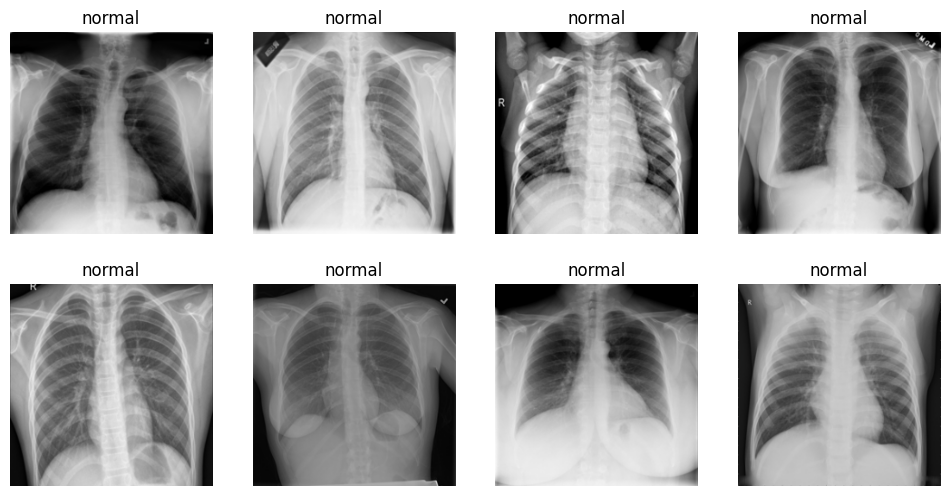

In [26]:
dls.valid.show_batch(max_n=8, nrows=2)  # Display a batch of validation data (maximum 8 samples, 2 rows)

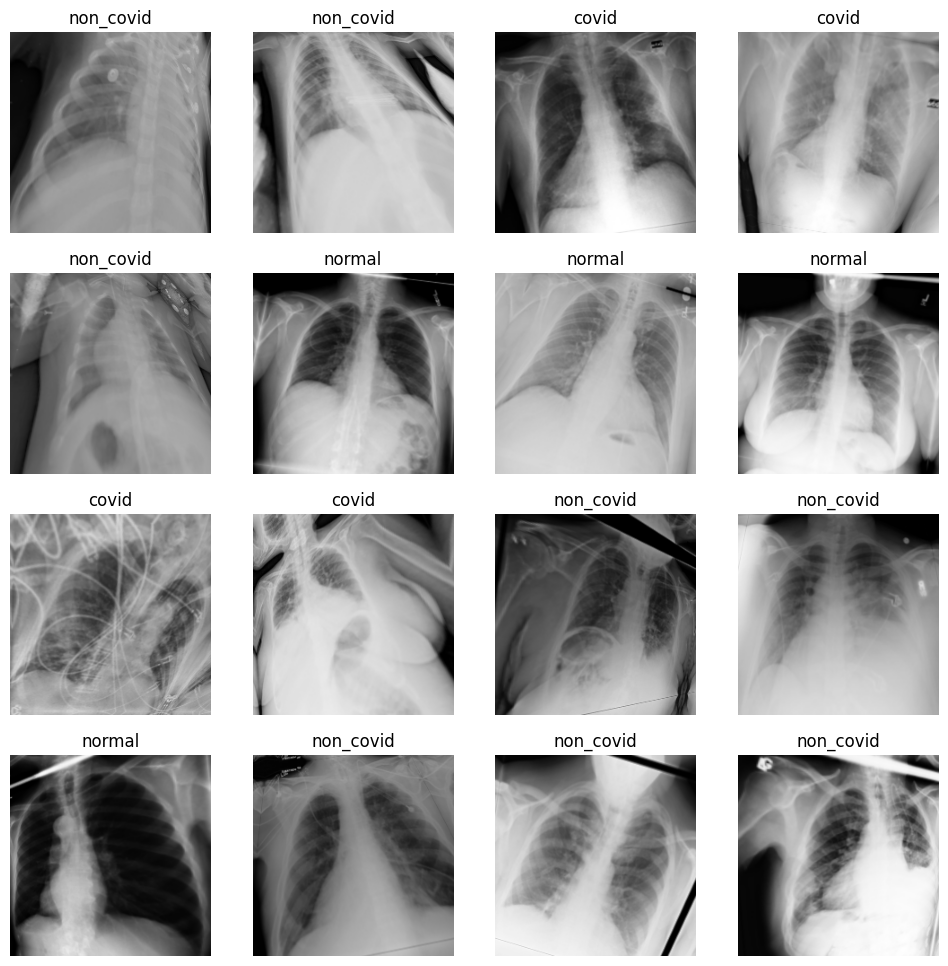

In [27]:
# Update the data block with item transformations (resizing images to 224x224)
# and batch transformations (doubling the augmentation transforms)
# This enhances the data processing pipeline with image resizing and increased data augmentation.
data_block = data_block.new(item_tfms=Resize(224), batch_tfms=aug_transforms(mult=2))

# Create new dataloaders based on the updated data block configuration.
dls = data_block.dataloaders(path)

# Display a batch of training data (maximum 16 samples, arranged in 4 rows)
dls.train.show_batch(max_n=16, nrows=4)

In [28]:
from efficientnet_pytorch import EfficientNet

data_block = data_block.new(

    batch_tfms=[*aug_transforms(size=224, mult=1), Normalize.from_stats(*imagenet_stats)]  # Data augmentation and normalization
)


# Create an EfficientNet model
eff_net = EfficientNet.from_pretrained("efficientnet-b0", include_top=True) # Replace 'efficientnet-b7' with the desired variant

dls = data_block.dataloaders(path)
#learn = Learner(dls, eff_net, metrics=error_rate)
#learn = Learner(dls, eff_net, metrics=Precision)
learn = Learner(dls, eff_net, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp)

learn.fit_one_cycle(12, 10e-4)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 412MB/s]


Loaded pretrained weights for efficientnet-b0


epoch,train_loss,valid_loss,accuracy,time
0,0.655721,0.435443,0.834172,00:50
1,0.546275,0.346471,0.878096,00:45
2,0.507361,0.364498,0.864938,00:45
3,0.481682,0.230636,0.920279,00:45
4,0.473807,0.636529,0.757159,00:45
5,0.446236,0.216544,0.923375,00:44
6,0.438311,0.213766,0.921053,00:44
7,0.410241,0.195365,0.926664,00:45
8,0.401055,0.173771,0.935372,00:45
9,0.390487,0.180751,0.934017,00:45


In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

              precision    recall  f1-score   support

       covid       1.00      0.95      0.97       814
   non_covid       0.95      0.92      0.93      2235
      normal       0.91      0.95      0.93      2119

    accuracy                           0.94      5168
   macro avg       0.95      0.94      0.95      5168
weighted avg       0.94      0.94      0.94      5168



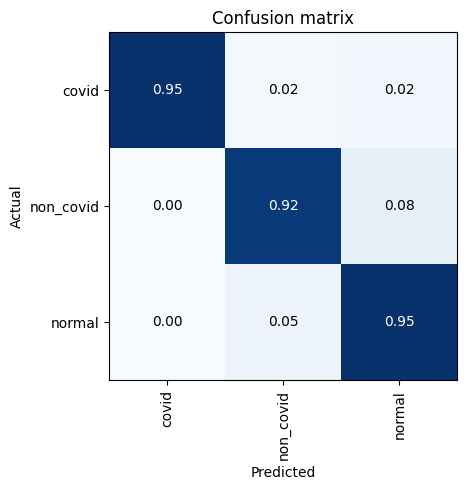

In [30]:
#interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize=True)

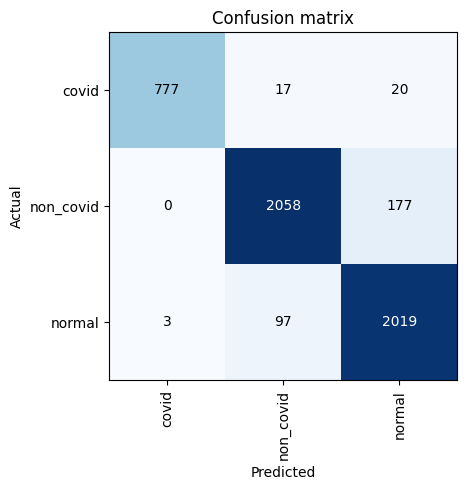

In [31]:
#interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

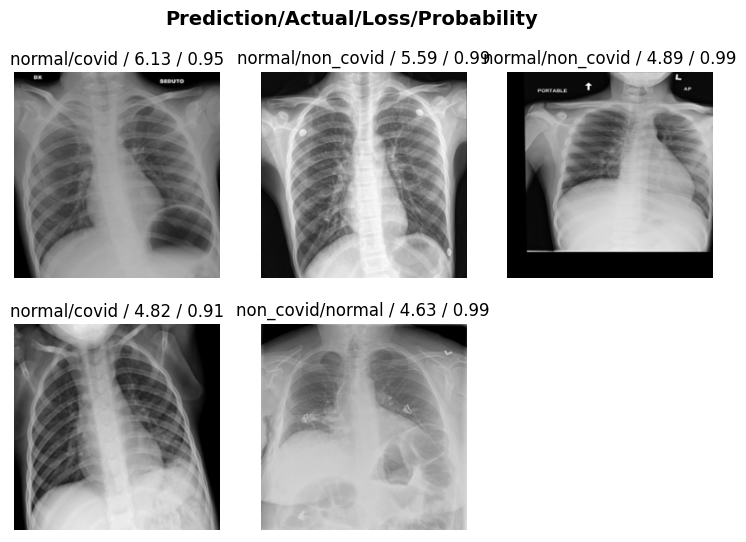

In [32]:
interp.plot_top_losses(5, nrows=2)

In [33]:
from fastbook import *
from fastai.vision.widgets import*

In [34]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [35]:
for idx in cleaner.delete() : cleaner.fns[idx].unlink()
for idx, covid in cleaner.change() : shutil.move(str(cleaner.fns[idx]),path/covid)
for idx, non_covid in cleaner.change() : shutil.move(str(cleaner.fns[idx]),path/non_covid)
for idx, normal in cleaner.change() : shutil.move(str(cleaner.fns[idx]),path/normal)

In [36]:
learn.export('predictcovidfastai29102023.pkl')

In [37]:
labels = learn.dls.vocab
labels

['covid', 'non_covid', 'normal']

In [38]:
learn_inf = load_learner('predictcovidfastai29102023.pkl')

In [ ]:
learn_inf.predict('/content/dataset/val/normal/Normal (10001).png')

In [40]:
learn_inf.dls.vocab

['covid', 'non_covid', 'normal']

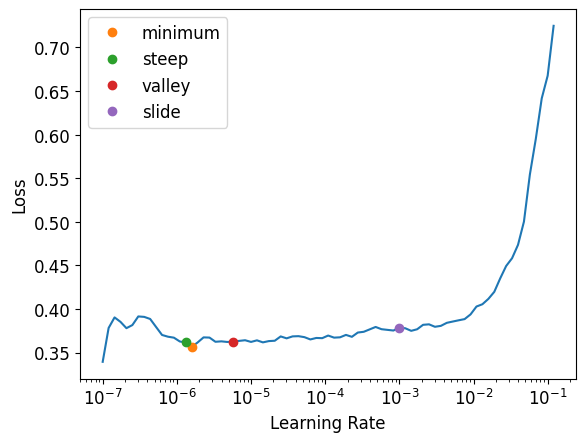

In [41]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
import gradio as gr

In [ ]:
from gradio.components import Image, label

In [ ]:
categories = learn.dls.vocab

def predict_image(get_image):
   pred, idx, probs = learn.predict(get_image)
   return dict(zip(categories, map(float, probs)))

In [ ]:
gr.Interface(fn=predict_image, inputs=gr.Image(shape=(224,224)),
             outputs = gr.Label(num_top_classes=3)).launch(share=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [42]:
from efficientnet_pytorch import EfficientNet
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                    get_items = get_image_files,
                    get_y=parent_label,
                    item_tfms = Resize(224),
                    batch_tfms = aug_transforms(size=224, min_scale=0.75))
dlsl = data_block.dataloaders(path)

model = EfficientNet.from_pretrained("efficientnet-b7", include_top=True)
eb7_learn = Learner(dlsl, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp).to_fp16()
eb7_learn.fit_one_cycle(17, 10e-4)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:00<00:00, 454MB/s]


Loaded pretrained weights for efficientnet-b7


epoch,train_loss,valid_loss,accuracy,time
0,0.599635,0.337453,0.874613,02:12
1,0.521426,0.230310,0.921246,02:13
2,0.496664,0.480556,0.854102,02:12
3,0.485979,0.564977,0.786958,02:13
4,0.455663,0.337222,0.879063,02:13
5,0.464374,0.237555,0.918731,02:13
6,0.439168,0.284995,0.900155,02:13
7,0.421588,0.229782,0.917183,02:12
8,0.420086,0.194154,0.934017,02:12
9,0.391209,0.198243,0.933437,02:12


In [ ]:
timm.list_models(pretrained=True)

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

In [43]:
eb7_interp = ClassificationInterpretation.from_learner(learn)
eb7_interp.print_classification_report()

              precision    recall  f1-score   support

       covid       1.00      0.95      0.97       814
   non_covid       0.95      0.92      0.93      2235
      normal       0.91      0.95      0.93      2119

    accuracy                           0.94      5168
   macro avg       0.95      0.94      0.95      5168
weighted avg       0.94      0.94      0.94      5168



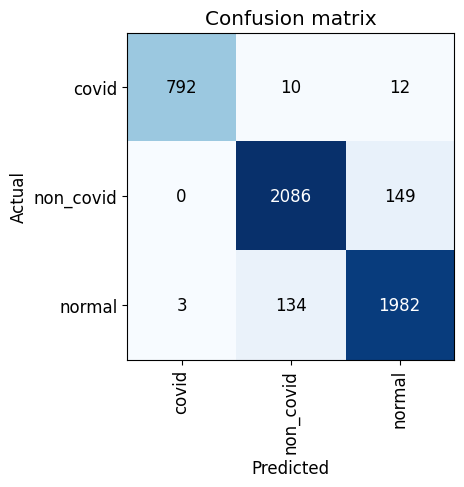

In [44]:
eb7_interp = ClassificationInterpretation.from_learner(eb7_learn)
eb7_interp.plot_confusion_matrix()

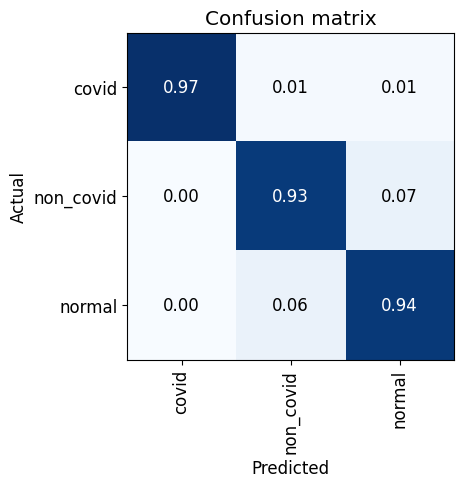

In [45]:
eb7_interp.plot_confusion_matrix(normalize=True)

In [ ]:
#learn.export('final_10102023eb7model.pkl')

In [46]:
eb7_learn.export('final_29102023eb7model.pkl')

In [47]:
get_learn_eb7 = load_learner('final_29102023eb7model.pkl')

In [ ]:
get_learn_eb7.predict('/content/unknowndataset/unknown/sub-S08046_ses-E17352_run-2_bp-chest_vp-ap_dx.png')

In [49]:
labels = get_learn_eb7.dls.vocab
labels

['covid', 'non_covid', 'normal']

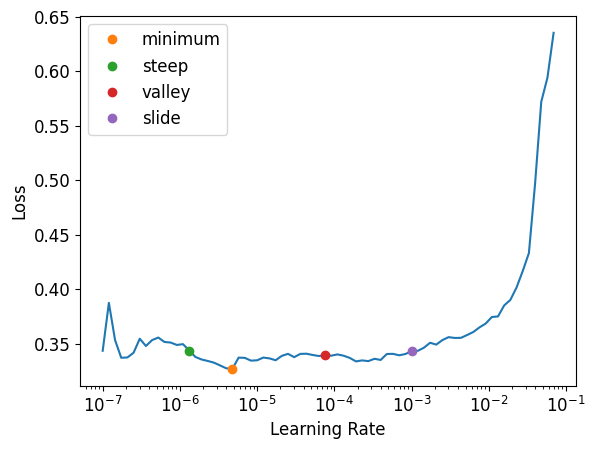

In [50]:
eb7lrs = eb7_learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [51]:
#export
categories = eb7_learn.dls.vocab

def classify_image(get_image):
   pred, idx, probs = eb7_learn.predict(get_image)
   return dict(zip(categories, map(float, probs)))

In [52]:
classify_image('/content/unknowndataset/unknown/sub-S08046_ses-E17352_run-2_bp-chest_vp-ap_dx.png')

{'covid': 0.881317675113678,
 'non_covid': 0.10775452107191086,
 'normal': 0.010627546347677708}

In [58]:
eb7_learn.model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [ ]:
gr.Interface(fn=classify_image, inputs=gr.Image(shape=(224,224)),
             outputs = gr.Label(num_top_classes=3)).launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.747s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run image_object_detection_app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.855s
your url is: https://heavy-clocks-attack.loca.lt


The next few cells will allow you to upload files directly from Google Colab to Google Storage.

In [ ]:
# Authentic Colab
# (running this will give you a code to authentic your Google Colab instance, keep the code secret)
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Install and initialize the gcloud command line tool - https://cloud.google.com/sdk/docs/install
# (this will give you access to gcloud tools within Colab)
!curl https://sdk.cloud.google.com | bash 1> /dev/null
!gcloud init

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0   5101      0 --:--:-- --:--:-- --:--:--  5151
######################################################################## 100.0%
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
######################################################################## 100.0%
mkdir -p /root
tar -C /root -zxvf /tmp/tmp.dDgsZc41mW/google-cloud-sdk.tar.gz
/root/google-cloud-sdk/install.sh
Beginning update. This process may take several minutes.


Your current Google Cloud CLI version is: 449.0.0
Installing components from version: 449.0.0

┌─────────────────────────────────────────────────────────────────────────────┐
│                     These components will be installed.                     │
├─────────────────────────────────────────────────────┬────────────┬──────────┤
│ 

In [ ]:
# Copy model to bucket - https://cloud.google.com/storage/docs/uploading-objects#gsutil
# Use "-r" for folders (r stands for recursive)
!gsutil cp -r predictcovidfastai10102023.pkl gs://c19_image_bucket

Copying file://predictcovidfastai10102023.pkl [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/21.1 MiB.                                     


In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


In [ ]:
!pip install torch

In [ ]:
import numpy as np

In [ ]:
from fastai.vision.all import get_c

IMAGE_SIZE = dls.one_batch()[0].shape[-2:] #dls is the dataloader you used for training
N_CLASSES = get_c(dls)

image_path = "/content/dataset/val/covid/covid_1021.png"
pred_fastai = learn.predict(image_path)
pred_fastai[0]

'covid'